In [2]:
import os
import torch
import torch.nn as nn
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from PIL import Image

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

<ipython-input-13-a05ad0fe2dc8>:39: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/densenet_face_classification.pth'))


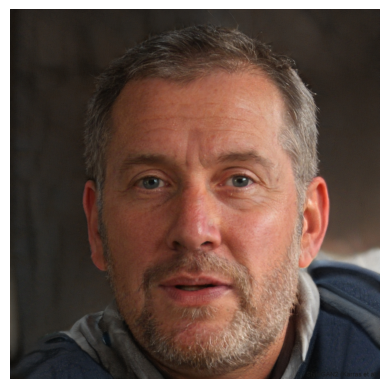

The image is classified as: AI-Generated Face


In [13]:


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),   # Resize images to 224x224
    transforms.ToTensor(),            # Convert images to PyTorch tensors
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize based on ImageNet mean and std
])

# Custom dataset class for test data
class CustomImageDataset(Dataset):
    def __init__(self, directory, label):
        self.directory = directory
        self.label = label
        self.image_paths = [os.path.join(directory, fname) for fname in os.listdir(directory) if is_valid_image_file(fname)]

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        image = data_transforms(image)
        return image, self.label

def is_valid_image_file(filename):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif', '.tiff', '.webp']
    return any(filename.lower().endswith(ext) for ext in valid_extensions)

# Load the trained model
model = models.densenet121(pretrained=False)
num_ftrs = model.classifier.in_features
model.classifier = nn.Sequential(
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(512, 1),
    nn.Sigmoid()
)
model.load_state_dict(torch.load('/content/densenet_face_classification.pth'))
model = model.to(device)
model.eval()  # Set the model to evaluation mode

# Function to predict a single image
def predict_single_image(image_path):
    # Open and preprocess the image
    image = Image.open(image_path).convert('RGB')
    image = data_transforms(image).unsqueeze(0)  # Add batch dimension

    # Move image to the appropriate device
    image = image.to(device)

    # Set model to evaluation mode
    model.eval()

    # Disable gradient calculation for inference
    with torch.no_grad():
        output = model(image)

        # Convert the output to binary (0 for real, 1 for synthetic)
        prediction = (output > 0.5).float()

        # Interpret the result
        if prediction.item() == 0:
            return "Real Face"
        else:
            return "AI-Generated Face"

# Example usage:
image_path = '/content/fake 1.png'  # Provide the image path here
result = predict_single_image(image_path)
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()
print(f"The image is classified as: {result}")


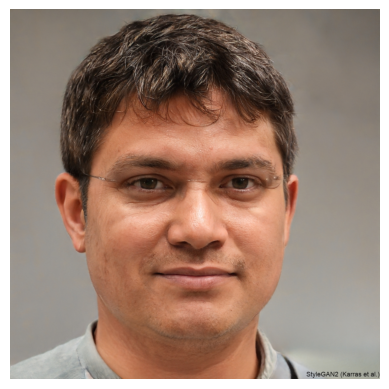

The image is classified as: AI-Generated Face


In [12]:
image_path = '/content/fake 2.png'  # Provide the image path here
result = predict_single_image(image_path)

image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()
print(f"The image is classified as: {result}")



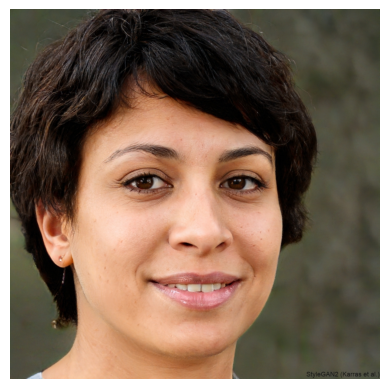

The image is classified as: AI-Generated Face


In [14]:
image_path = '/content/fake 3.png'  # Provide the image path here
result = predict_single_image(image_path)

image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

print(f"The image is classified as: {result}")

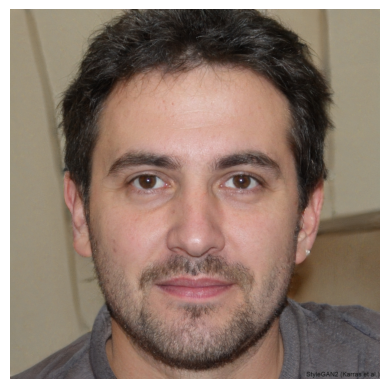

The image is classified as: AI-Generated Face


In [15]:
image_path = '/content/fake 4.png'  # Provide the image path here
result = predict_single_image(image_path)

image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()


print(f"The image is classified as: {result}")

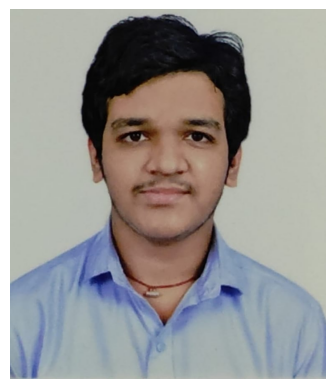

The image is classified as: AI-Generated Face


In [16]:
image_path = '/content/real 1.jpg'  # Provide the image path here
result = predict_single_image(image_path)

image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()


print(f"The image is classified as: {result}")

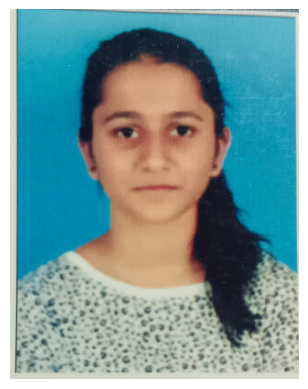

The image is classified as: Real Face


In [17]:
image_path = '/content/real 2.jpg'  # Provide the image path here
result = predict_single_image(image_path)

image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

print(f"The image is classified as: {result}")

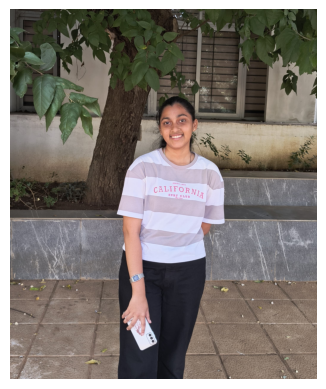

The image is classified as: Real Face


In [19]:
image_path = '/content/real 3.png'  # Provide the image path here
result = predict_single_image(image_path)

image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

print(f"The image is classified as: {result}")

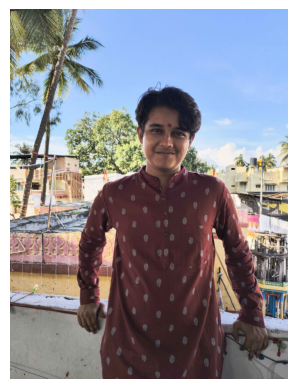

The image is classified as: Real Face


In [20]:
image_path = '/content/real 4.jpg'  # Provide the image path here
result = predict_single_image(image_path)

image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

print(f"The image is classified as: {result}")

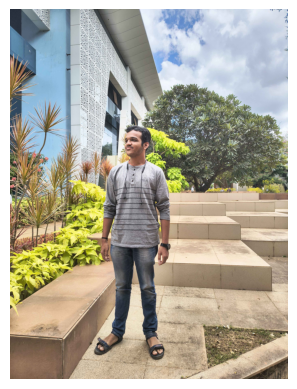

The image is classified as: Real Face


In [21]:
image_path = '/content/real 5.jpg'  # Provide the image path here
result = predict_single_image(image_path)

image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

print(f"The image is classified as: {result}")

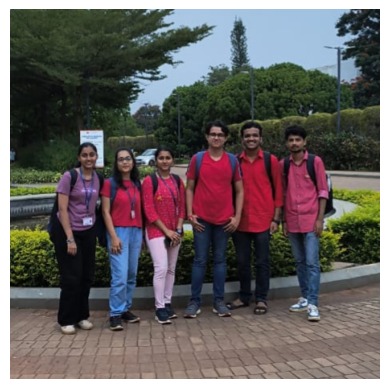

The image is classified as: Real Face


In [23]:
image_path = '/content/group 1.png'  # Provide the image path here
result = predict_single_image(image_path)

image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Hide the axes
plt.show()

print(f"The image is classified as: {result}")